In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [38]:
# 데이터 불러오기
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [39]:
def check_df(dataframe, head=5):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Head #####################")
    print(dataframe.head(head))

In [40]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())

In [41]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [42]:
# 날짜형으로 변환할 컬럼 목록
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [43]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

In [44]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [45]:
# 오타 수정
marketing['category2'] = marketing['category2'].replace('낚세', '낚시')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [46]:
# order_status별 결측치 확인
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [47]:
# order_delivered_timestamp이 결측인 경우의 order_status 확인
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# 배송이 되지 않은 고객들의 order_delivered_timestamp가 결측치 인것 을 확인 할수 있다. 그럼으로 타당한 결측치임으로 유지한다.
# canceled인데 order_delivered_timestamp있는 값과 delivered인데 order_delivered_timestamp 없는 값 확인 필요

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [48]:
# 실제 배송 완료된 고객만 approval_delay_minutes(결제승인까지 걸린 시간 (분 단위)) 결측값을 중앙값으로 대체
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes 결측값이 사라짐
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

/var/folders/nt/92hmc1p9193g7_fqnj1cwwjm0000gn/T/ipykernel_22854/348787432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)


In [49]:
# delivered인데 order_delivered_timestamp 없는 값 확인 필요
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# 배송 완료된 고객중 order_delivered_timestamp(배송 완료시간) 결측값 확인
check_df(marketing_delivered)

##################### Shape #####################
(102624, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102624 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102624 non-null  object        
 1   customer_id                    102624 non-null  object        
 2   order_status                   102624 non-null  object        
 3   order_purchase_timestamp       102624 non-null  datetime64[ns]
 4   order_approved_at              102624 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102624 non-null  datetime64[ns]
 7   age                            102624 non-null  int64         
 8   gender                         102624 non-null  object        
 9   country                     

In [50]:
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()
# delivery_delay_days가 Null인 항목은 order_delivered_timestamp을 알수 없음으로 결측치 제거
check_df(marketing_delivered)

##################### Shape #####################
(102616, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102616 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102616 non-null  object        
 1   customer_id                    102616 non-null  object        
 2   order_status                   102616 non-null  object        
 3   order_purchase_timestamp       102616 non-null  datetime64[ns]
 4   order_approved_at              102616 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102616 non-null  datetime64[ns]
 7   age                            102616 non-null  int64         
 8   gender                         102616 non-null  object        
 9   country                     

In [51]:
# 무게가 0인것 카테고리 확인 및 카테고리 평균값으로 대체 할것인지 확인
zero_weight = marketing_delivered[marketing_delivered['weight_kg'] == 0]
zero_weight_categories = zero_weight['category2'].unique()



category_weight_mean = marketing_delivered[marketing_delivered['weight_kg'] > 0].groupby('category2')['weight_kg'].mean().round()

def round_to_custom_bin(x):
    if x < 1:
        return 0
    elif x < 5:
        return 1
    elif x < 10:
        return 5
    elif x < 25:
        return 10
    else:
        return 25

category_weight_mean = category_weight_mean.apply(round_to_custom_bin)

category_weight_mean

category2
1인가구       10
가공식품        5
거실장/테이블    10
건강가전        5
건강식품        5
골프          5
낚시          5
남성의류        1
남성화장품       5
냉장고         5
네일케어        1
등산          5
마스크/팩       5
메이크업        5
바디케어        5
비데          5
선케어         5
세탁기/건조기     5
쇼파         10
수납장/선반     10
스킨케어        5
스포츠의류       1
신선식품        5
야외가구       10
여성의류        1
옷장/행거      10
유아의류        1
음향가전        5
주방가전        5
책상/책장      10
청소기         5
침대         10
캠핑          5
파티의류        1
향수          5
헤어케어        1
화장대        10
Name: weight_kg, dtype: int64

In [52]:
# 무게가 타당해 보여서 무게가 0인것 카테고리 평균 무게로 기입
def fill_weight(row):
    if row['weight_kg'] == 0 and row['category2'] in category_weight_mean:
        return category_weight_mean[row['category2']]
    return row['weight_kg']

# 적용
marketing_delivered['weight_kg'] = marketing_delivered.apply(fill_weight, axis=1)

In [53]:
#할부가 0인 이상치 확인
zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]

# 필요한 컬럼만 선택해서 출력
print(zero_p[['price', 'payment_type', 'payment_installments', 'order_status']])

### 결제방식별 0값 파악

zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]
payment_type_counts = zero_p['payment_type'].value_counts()
print(payment_type_counts)

### 0인값 제품 카테고리 파악
zero_products = marketing_delivered[marketing_delivered['payment_installments'] == 0]['category1'].unique()
print(zero_products)

        price payment_type  payment_installments order_status
62759   39.53  credit_card                     0    delivered
100595  70.66  credit_card                     0    delivered
payment_type
credit_card    2
Name: count, dtype: int64
['스포츠용품' '식품']


In [54]:
#할부가 0인 이상치 1로 조정
marketing_delivered.loc[marketing_delivered['payment_installments'] == 0, 'payment_installments'] = 1

<Axes: xlabel='weight_kg', ylabel='shipping_charges'>

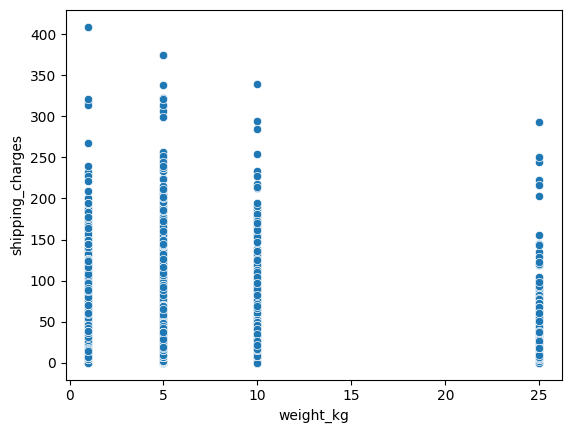

In [55]:
#   무게랑 배송비 비교 배송비가 넘 많은 경우 무게가 많이 들어서 비싼가?? 그럼 합리적인가? 보려고 - 선미
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')

In [56]:
# 파생 변수 컬럼 만들기
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days

In [57]:
# 왜도 완화 및 정규화/표준화
# log로 변환할 컬럼 목록
logs_cols = [
    'shipping_charges',
    'total_price',
    'approval_delay_minutes',
    'density',
    'delivery_total_days'
]
# log에서 std로 변환할 컬럼 목록
stdlog_cols = [
    'shipping_charges', # 로그 변환했어도 여전히 수치 차이 존재. 다른 변수와 영향력 맞추기 위해 표준화 필요
    'total_price', # 구매 금액은 수천~수십만 원까지 매우 큼. 정규화 없이 쓰면 거리 계산 시 이 값 하나가 군집을 결정해버림
    'approval_delay_minutes', # 분 단위 수천까지 존재 → 평균 0, 분산 1로 맞추지 않으면 전체 거리 구조 왜곡
    'density', # 단위가 복잡하고 수치 폭 넓음. 다른 변수들과 거리 계산 시 과대반영 방지
    'delivery_total_days' # delivery_delay_days와 비슷한 값임으로 음수 양수를 포함하고 있음.
]
# std로 변환할 컬럼 목록
std_cols = [
    'payment_installments', # 대부분 1, 일부 12개월 등 극단 값 존재. 표준화 없이 쓰면 비정상적으로 그룹 나뉠 수 있음
    'delivery_delay_days' # 음수~양수 포함. 중심을 0으로 두고 표준편차 맞추면 분포가 잘 반영됨
]

In [58]:
for col in logs_cols:
    marketing_delivered['log_' + col] = marketing_delivered[col].apply(
        lambda x: np.log1p(x) if x > -1 else 0  # 0 값으로 대체
)

scaler = StandardScaler()
for col in stdlog_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[['log_' + col]])
for col in std_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[[col]])

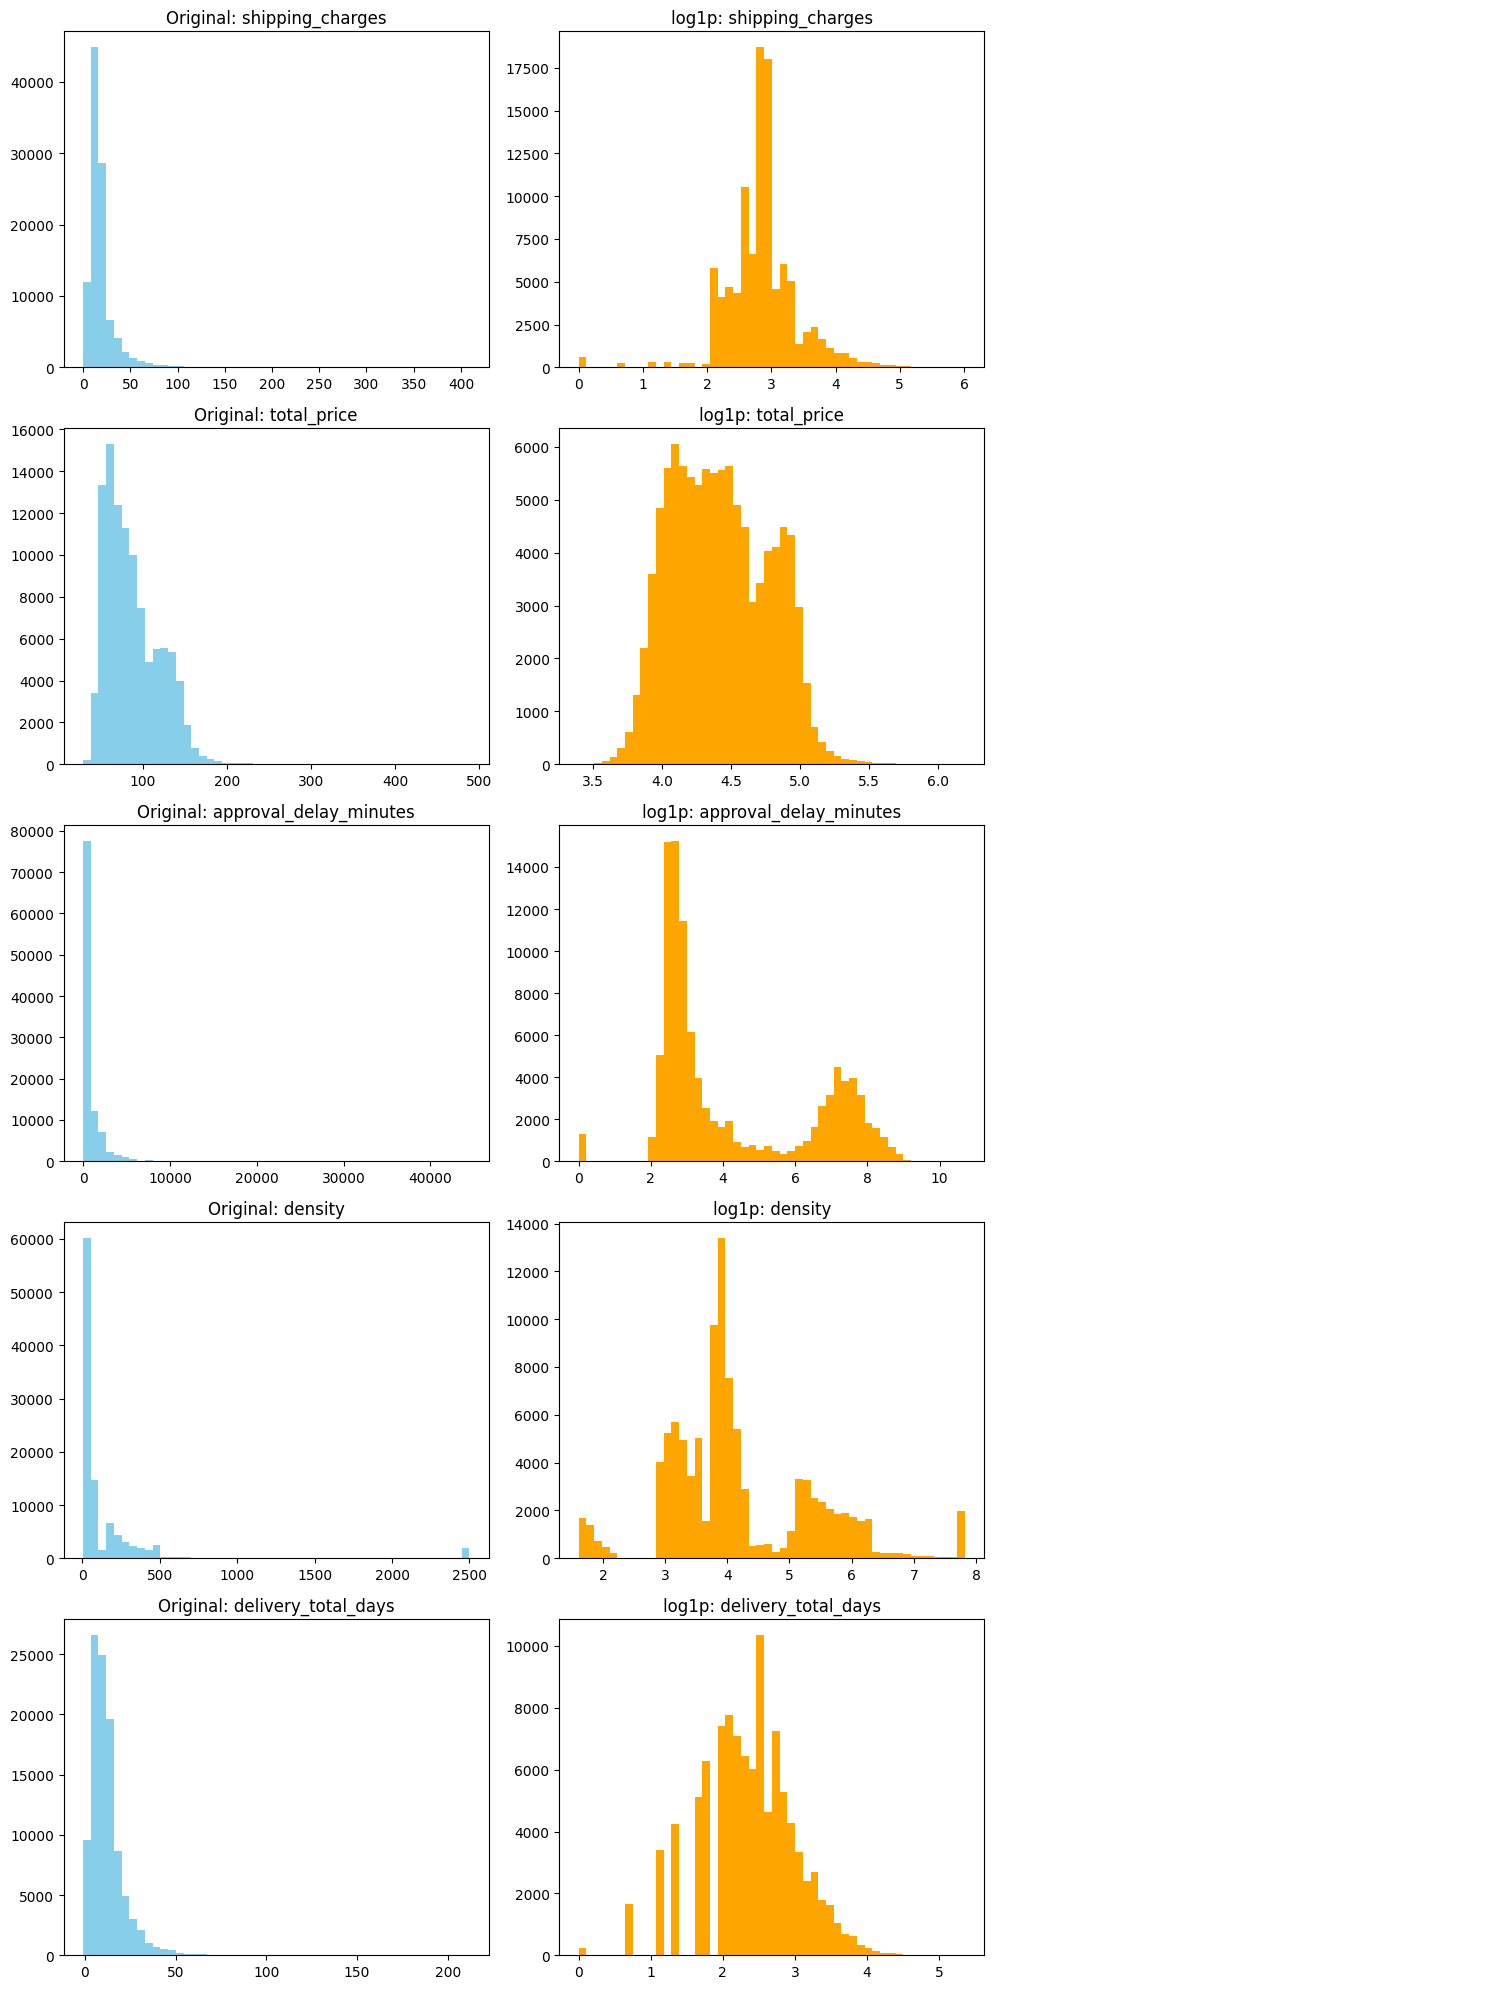

In [59]:
# 차트로 시각화 (로그 전/후, 표준화 전/후 비교)
# 표준화는 거리 기반 계산을 위한 스케일 통일 목적
fig, axes = plt.subplots(len(logs_cols), 3, figsize=(15, 4 * len(logs_cols)))

for i, col in enumerate(logs_cols):
    # 원본
    axes[i, 0].hist(marketing_delivered[col].dropna(), bins=50, color='skyblue')
    axes[i, 0].set_title(f"Original: {col}")

    # 로그 변환
    axes[i, 1].hist(marketing_delivered['log_' + col].dropna(), bins=50, color='orange')
    axes[i, 1].set_title(f"log1p: {col}")

    # 표준화
    if col in std_cols:
        axes[i, 2].hist(marketing_delivered['std_' + col].dropna(), bins=50, color='green')
        axes[i, 2].set_title(f"StandardScaler: {col}")
    else:
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [60]:
# 목적별 클러스터링용 데이터프레임 생성
# 1_고객행동_미주
df_behavior = marketing_delivered[[
    'std_total_price', 'std_shipping_charges', 'std_payment_installments', 'review_score'
]]

# 2_배송경험_인재
df_experience = marketing_delivered[[
    'std_delivery_delay_days', 'std_delivery_total_days', 'review_score', 'std_approval_delay_minutes'
]]

# 3_제품특성_선미
df_product = marketing_delivered[[
    'std_density', 'std_total_price'
]]

# 4_혼합전략_상규
df_mixed = marketing_delivered[[
    'std_total_price', 'std_shipping_charges', 'std_delivery_total_days', 'std_payment_installments',
    'std_approval_delay_minutes', 'std_delivery_delay_days',
    'review_score', 'std_density'
]]

In [61]:
marketing_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'age', 'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id', 'total_price', 'density', 'delivery_total_days', 'log_shipping_charges', 'log_total_price', 'log_approval_delay_minutes', 'log_density', 'log_delivery_total_days', 'std_shipping_charges', 'std_total_price', 'std_approval_delay_minutes', 'std_density', 'std_delivery_total_days', 'std_payment_installments', 'std_delivery_delay_days'], dtype='object')

In [ ]:
# # LTV란?
# # LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익

# ltv_df = df_merged.groupby('cluster').agg(
#     total_ltv=('total_price', 'sum'),  # 총 구매 금액
#     avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
#     purchase_count=('order_id', 'count'),  # 총 구매건수
#     unique_customers=('customer_id', 'nunique')  # 고객 수
# ).reset_index()

# # 고객당 평균 LTV 및 재구매율
# ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
# ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

# ltv_df


# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # LTV per customer 시각화
# sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
# axes[0].set_title('Cluster별 1인당 평균 LTV')
# axes[0].set_ylabel('LTV per Customer')
# axes[0].set_xlabel('cluster')

# # 재구매율 시각화
# sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
# axes[1].set_title('Cluster별 재구매율')
# axes[1].set_ylabel('Repurchase Rate')
# axes[1].set_xlabel('cluster')

# plt.tight_layout()
# plt.show()

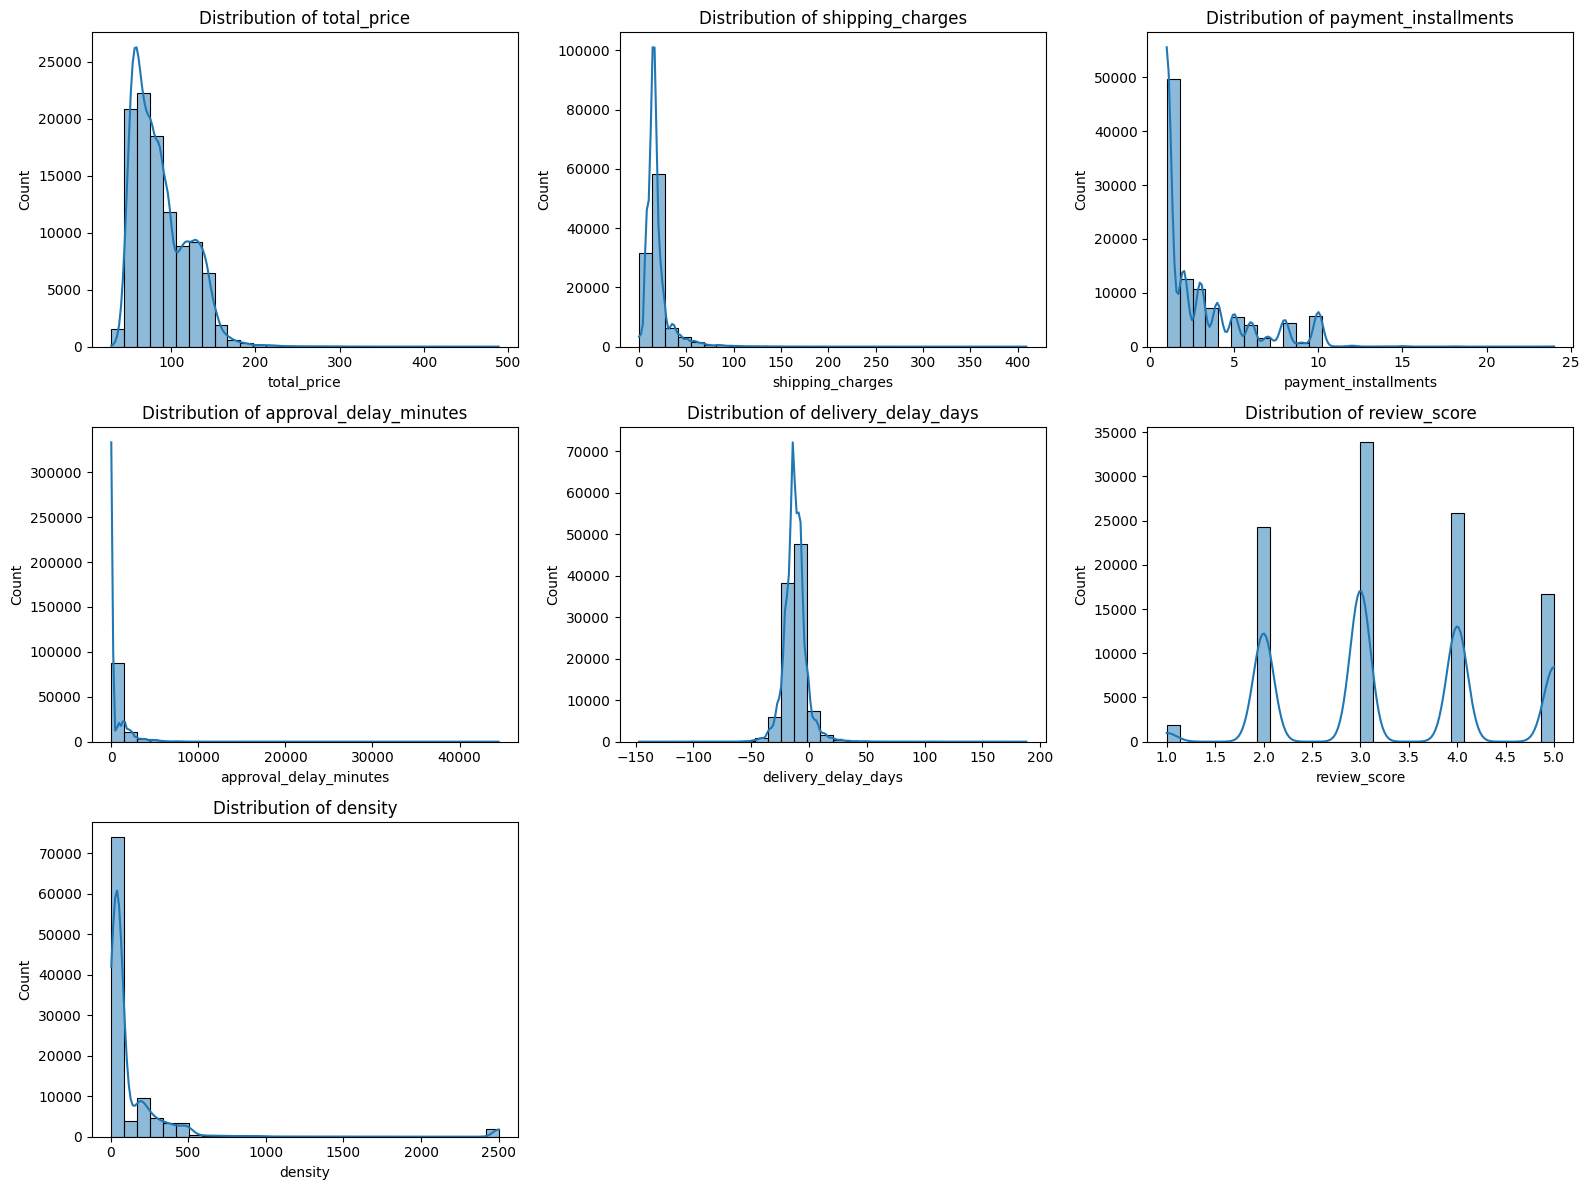

In [62]:
# 1_고객행동_미주
df_behavior = marketing_delivered[[
    'std_total_price', 'std_shipping_charges', 'std_payment_installments','review_score'
]]


review_df = marketing_delivered[[
    'total_price', 'shipping_charges', 'payment_installments',
    'approval_delay_minutes', 'delivery_delay_days',
    'review_score', 'density'
]]


plt.figure(figsize=(16, 12))
for i, col in enumerate(review_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(review_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [63]:
'''
<전처리 후 데이터 경향 파악>
**1. 총 비용 : 대부분 낮은 금액 결제, 일부 고가 금액 
**2. 배송비 : 대부분 배송비 저렴 or 무료배송, 총 비용에 배송비의 영향은 적은편
**3. 할부 횟수 : 일시불 많음 일부는 장기할부
4. 결제 승인 지연 시간 : 대체로 승인 빠름
5. 지연 배송일 : 대부분 조기 배송
**6. 리뷰 점수 : 평균적인 점수
7. 밀도 : 가볍고 큰 제품 선호 / 이상치 존재
'''


'\n<전처리 후 데이터 경향 파악>\n**1. 총 비용 : 대부분 낮은 금액 결제, 일부 고가 금액 \n**2. 배송비 : 대부분 배송비 저렴 or 무료배송, 총 비용에 배송비의 영향은 적은편\n**3. 할부 횟수 : 일시불 많음 일부는 장기할부\n4. 결제 승인 지연 시간 : 대체로 승인 빠름\n5. 지연 배송일 : 대부분 조기 배송\n**6. 리뷰 점수 : 평균적인 점수\n7. 밀도 : 가볍고 큰 제품 선호 / 이상치 존재\n'

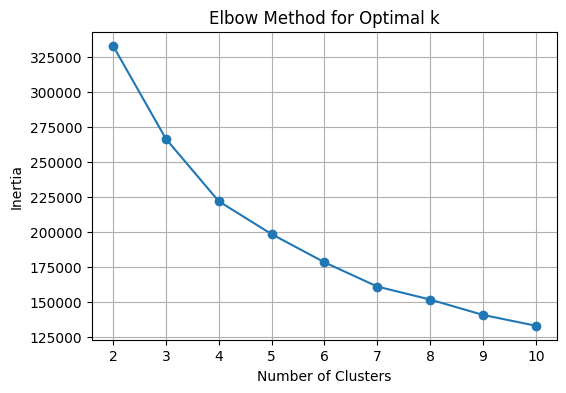

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 수 후보
cluster_range = range(2, 11)
inertia_list = []

# inertia (within-cluster sum of squares) 계산
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_behavior)
    inertia_list.append(kmeans.inertia_)

# Elbow Plot 시각화
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

/var/folders/nt/92hmc1p9193g7_fqnj1cwwjm0000gn/T/ipykernel_22854/2909725201.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_behavior['cluster'] = kmeans.fit_predict(df_behavior)


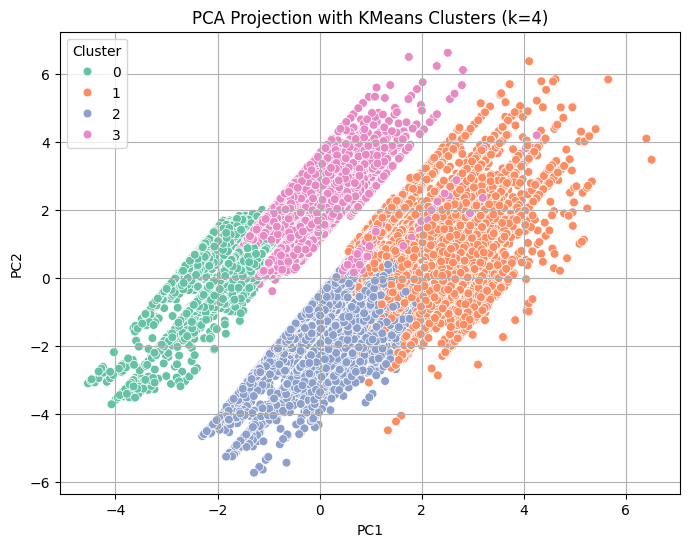

In [97]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PCA 먼저 수행 (원본 df_behavior로)
X_pca = PCA(n_components=2).fit_transform(df_behavior)

# 2. KMeans 클러스터링 (PCA가 아닌 원본 데이터 기준으로)
kmeans = KMeans(n_clusters=4, random_state=42)
df_behavior['cluster'] = kmeans.fit_predict(df_behavior)

# 3. 시각화 (PCA 결과와 클러스터 결과 매칭)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_behavior['cluster'], palette='Set2', s=40)
plt.title('PCA Projection with KMeans Clusters (k=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [98]:
df_behavior.groupby('cluster').mean()

,std_total_price,std_shipping_charges,std_payment_installments,review_score
cluster,,,,
0,-0.779093,-0.374979,-0.320037,4.408264
1,0.433529,0.624448,1.767325,3.083953
2,-0.302313,-0.301893,-0.373754,2.472162
3,0.973874,0.447495,-0.355813,4.056414


In [ ]:
'''
클러스터 0 : 초저가고객(총비용⬇️) + 할부 적음 + 평점 높음 
클러스터 1 : 고가고객(배송비⬆️) + 할부 많음 + 평점 보통
클러스터 2 : 저가고객 + 할부 적음 + 평점 낮음
클러스터 3 : 고가고객(총비용⬆️) + 할부 적음 + 평점 높음
'''

In [ ]:
'''
결제유형 : 신용카드 결제가 가장 많음, 1군집은 거의 대다수가 신용카드결제
카테고리1 : 대체로 식품을 많이 사고, 0군집은 스포츠 용품/의류, 3군집은 전자제품
성별 : 여성이 더 많음 60%
나라 : 중국이 가장 많고 다음 한국
연령대 : 0군집 20대, 3군집 30대-40대
'''

In [112]:
marketing_delivered['cluster'] = df_behavior['cluster']

def age_to_group(age):
    if age <= 19:
        return '10대'
    elif age <= 29:
        return '20대'
    elif age <= 39:
        return '30대'
    elif age <= 49:
        return '40대'
    elif age <= 59:
        return '50대'
    else:
        return '60대 이상'

marketing_delivered['agegroup'] = marketing_delivered['age'].apply(age_to_group)

# 순서형 카테고리 지정
labels = ['20 이하', '20대', '30대', '40대', '50대', '60대 이상']
marketing_delivered['agegroup'] = pd.Categorical(marketing_delivered['agegroup'], categories=labels, ordered=True)

In [113]:
### 글자깨짐 해결

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_cluster_bar_ratio(df, column, cluster_col='cluster', order=None):
    
    count_df = df.groupby([cluster_col, column]).size().reset_index(name='count')
    count_df['percentage'] = count_df['count'] / count_df.groupby(cluster_col)['count'].transform('sum') * 100
    
    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(data=count_df, x=column, y='percentage', hue=cluster_col, order=order, palette='Set2')
    plt.title(f'클러스터별 {column} 분포 (비율 %)')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.legend(title='클러스터')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


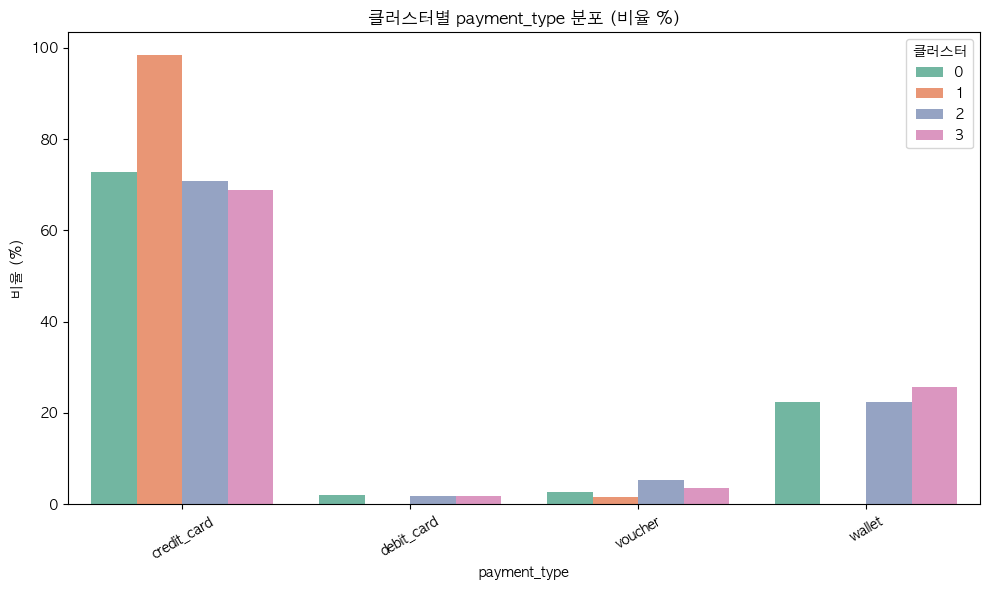

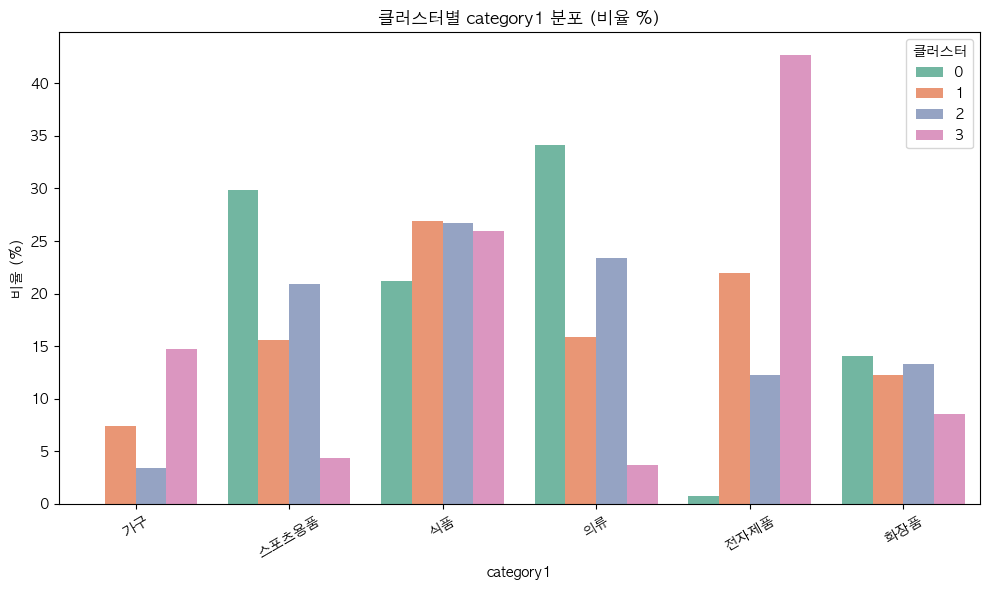

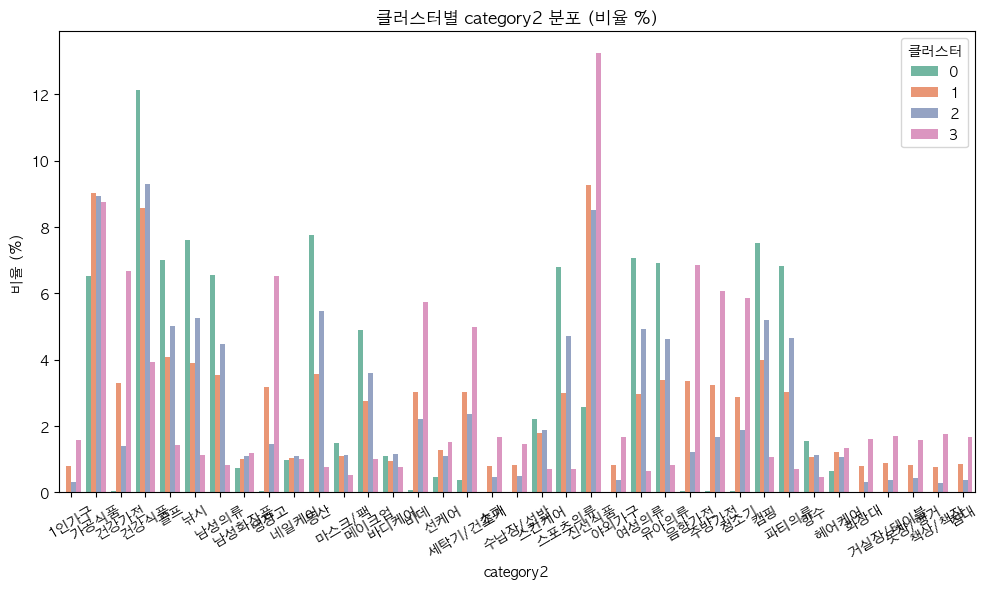

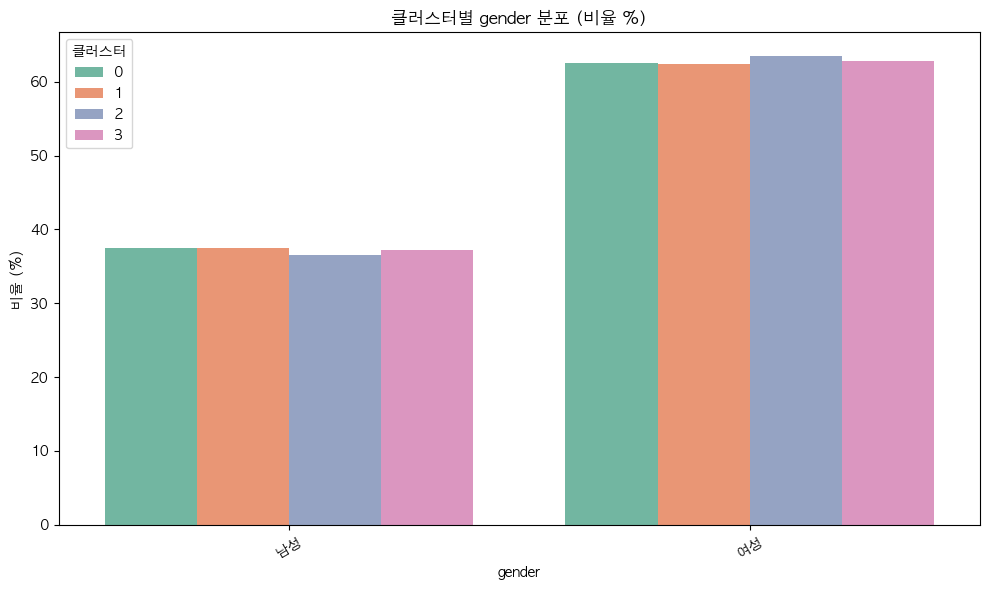

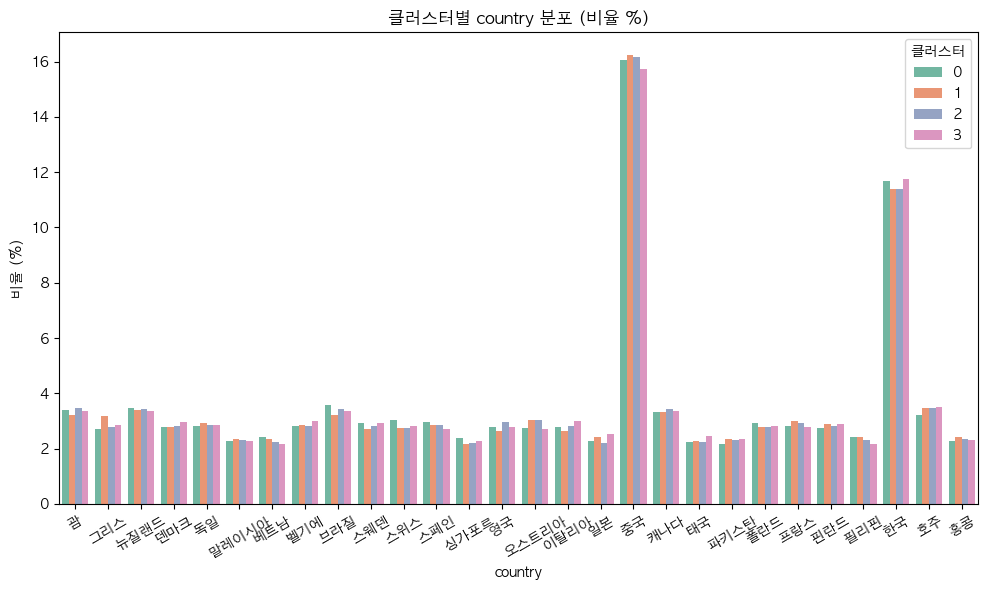

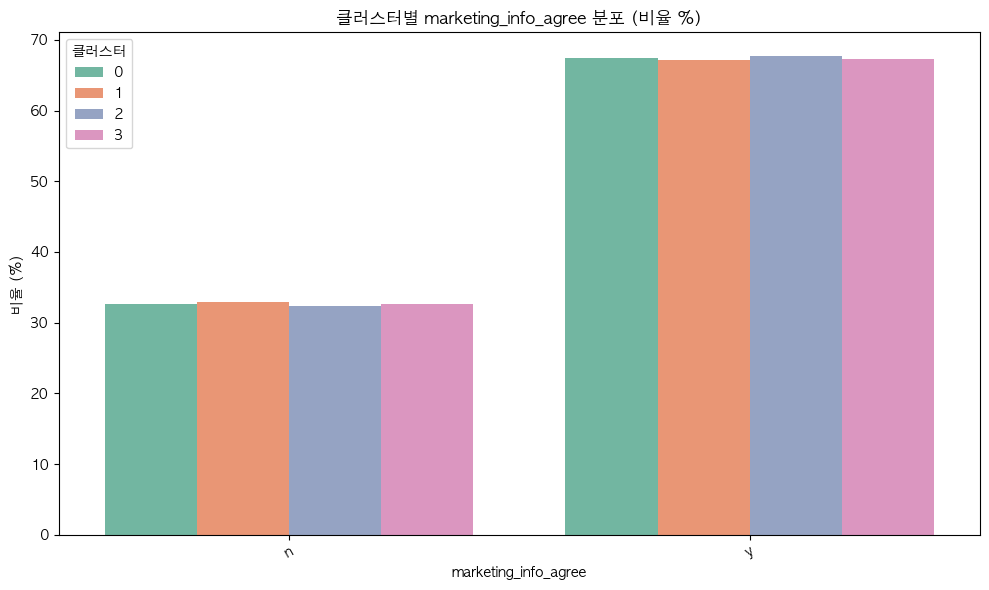

/var/folders/nt/92hmc1p9193g7_fqnj1cwwjm0000gn/T/ipykernel_22854/967154735.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby([cluster_col, column]).size().reset_index(name='count')


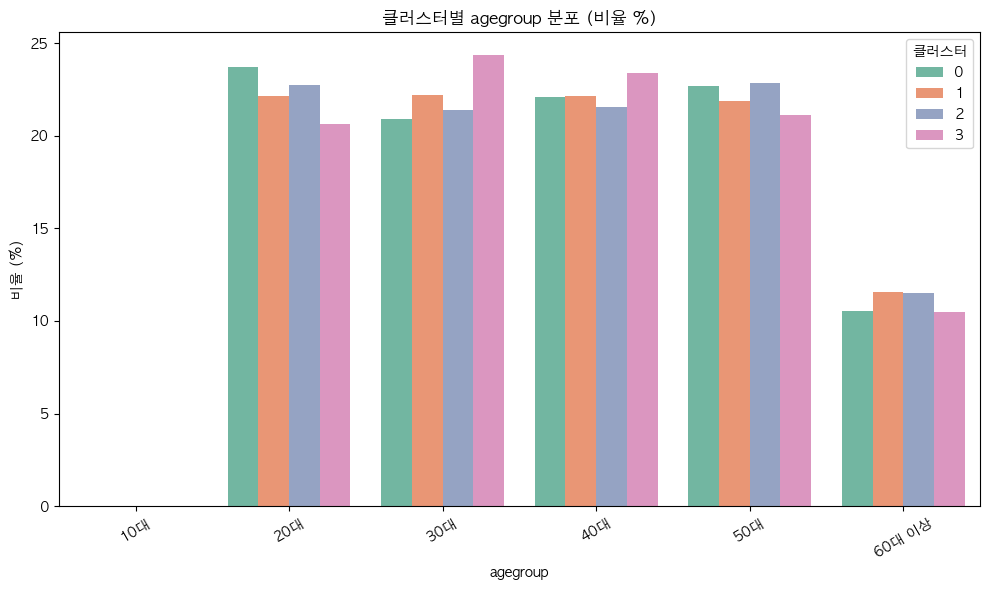

In [115]:
# 변수별 시각화
plot_cluster_bar_ratio(marketing_delivered, 'payment_type')
plot_cluster_bar_ratio(marketing_delivered, 'category1')
plot_cluster_bar_ratio(marketing_delivered, 'category2')
plot_cluster_bar_ratio(marketing_delivered, 'gender')
plot_cluster_bar_ratio(marketing_delivered, 'country')
plot_cluster_bar_ratio(marketing_delivered, 'marketing_info_agree')
plot_cluster_bar_ratio(marketing_delivered, 'agegroup', order=age_order)

/var/folders/nt/92hmc1p9193g7_fqnj1cwwjm0000gn/T/ipykernel_22854/3525554334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_behavior['cluster'] = kmeans.fit_predict(df_behavior)


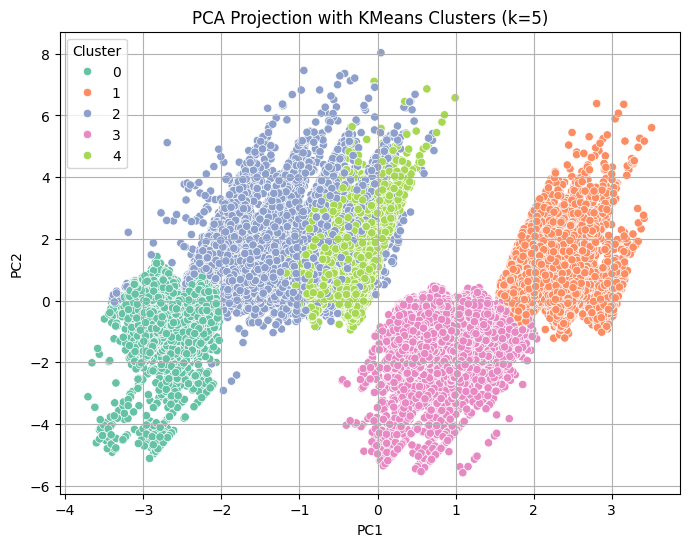

In [92]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_behavior)

# KMeans 클러스터링 (k=5개)
kmeans = KMeans(n_clusters=5, random_state=42)
df_behavior['cluster'] = kmeans.fit_predict(df_behavior)

# 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_behavior['cluster'], palette='Set2') 
plt.title('PCA Projection with KMeans Clusters (k=5)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [91]:
df_behavior.groupby('cluster').mean()

,std_total_price,std_shipping_charges,std_payment_installments,review_score
cluster,,,,
0,-0.781111,-0.373926,-0.326672,4.405857
1,0.316912,0.589480,2.079944,3.245560
2,0.869722,0.364293,-0.290304,4.397990
3,-0.726480,-0.460574,-0.301616,2.519028
4,0.933594,0.377926,-0.319571,2.529474


'\n클러스터 0 : 저가고객(총비용&배송비) + 할부 적음 + 배송&승인 지연 + 평점 높음 + 저밀도 -> 실속\n클러스터 1 : 일반 고객(총비용&배송비) + 할부 많음 + 배송&승인 빠름 + 평점 보통 + 고밀도 -> 가전제품??\n클러스터 2 : 고가고객(총비용&배송비-높음) + 할부 중간 + 배송 빠름&승인 지연 + 평점 보통 + 저밀도 -> 배송비도 매우 높은 고가제품\n클러스터 3 : 저가고객(총비용&배송비) + 할부 적음 + 배송&승인 지연+ 평점 낮음 + 고밀도 -> 까다로움\n'